In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(248, 474, 3)


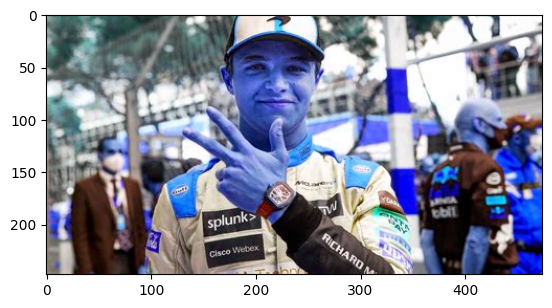

In [2]:
img = cv2.imread('test_images/Lando Norris did not feel like a _star_ afte.jpg')
print(img.shape)
plt.imshow(img);

In [3]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape

(248, 474)

In [4]:
grey

array([[176, 179, 156, ..., 250, 249, 249],
       [176, 177, 156, ..., 255, 247, 247],
       [179, 177, 160, ..., 255, 254, 254],
       ...,
       [131, 127, 123, ...,  65,  61,  73],
       [135, 131, 129, ...,  68,  89, 113],
       [132, 128, 127, ...,  73,  80, 112]], dtype=uint8)

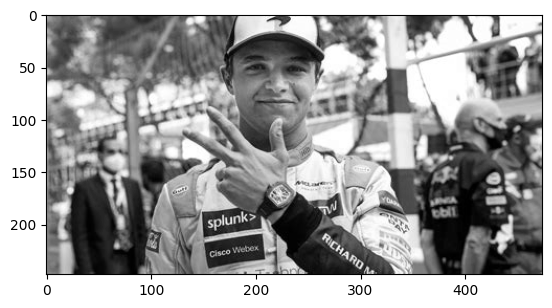

In [5]:
plt.imshow(grey, cmap = 'grey');

## OpenCV has documentation about face detection using Haar detection. That is what I will be using
See here: https://docs.opencv.org/3.4/d2/d99/tutorial_js_face_detection.html

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
faces #this gives an array of faces described as x,y,w,h. Meaning, x is where is starts, y is where it starts with height, then go over w or h 

array([[174,  20,  90,  90]], dtype=int32)

In [7]:
x,y,w,h = faces[0] # The coordinates of the face is stored here
x,y,w,h

(174, 20, 90, 90)

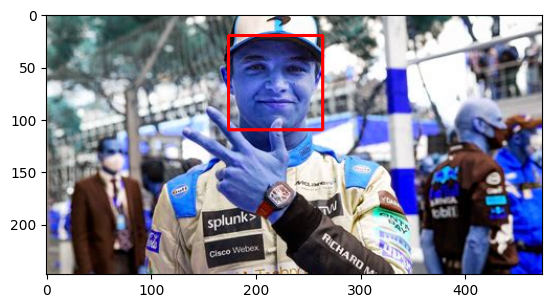

In [8]:
face_box = cv2.rectangle(img, (x,y), ((x+w),(y+h)),(255, 0, 0), 2)
plt.imshow(face_box);

### Eye Detection. This is just code from the haar cascades documentation
But basically, for every face in faces, it detects eyes within the face. Then it gets the region of interest with its region (
start at y and moves to y + h). Then does the same for x. Then it moves the roi grey into the eye cascade function and detects the eyes.
Then for each eye, it draws a box

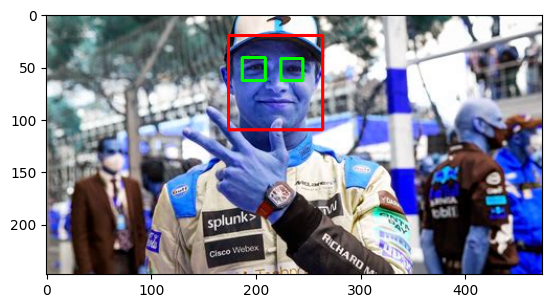

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_box = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = face_box[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_box, cmap='gray')
plt.show()

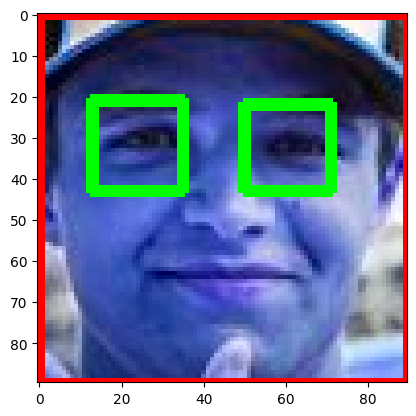

In [10]:
plt.imshow(roi_color)

In [11]:
def get_cropped_faces_with_two_eyes(img_path):
    """
    This function takes an image path and returns a cropped face if the image contains two eyes
    """
    img = cv2.imread(img_path)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grey, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_grey = grey[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_grey)
        if len(eyes) >= 2:
            return roi_color

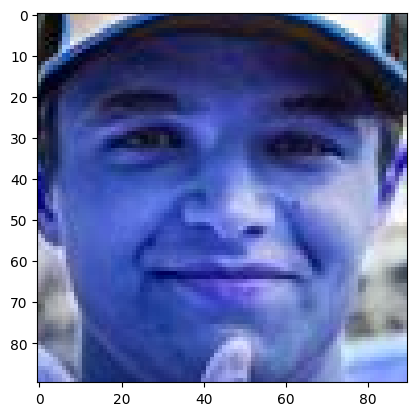

In [12]:
cropped_img = get_cropped_faces_with_two_eyes('test_images/Lando Norris did not feel like a _star_ afte.jpg')
plt.imshow(cropped_img);

How does the function work when one eye is obstructed? It should return nothing.

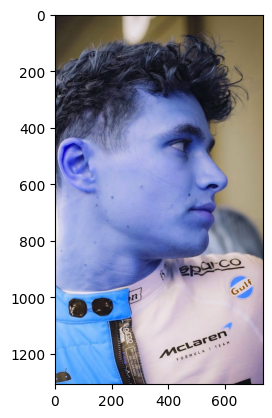

In [13]:
# Image with one eye
one = cv2.imread('test_images/Norris One Eye.jpg')
plt.imshow(one)

In [14]:
img_one_eye = get_cropped_faces_with_two_eyes('test_images/Norris One Eye.jpg')
# plt.imshow(img_one_eye) This returns an error because the function returned nothing
img_one_eye; #Returns nothing because the image does not have two eyes

### Now we have to store the cropped images in a folder. How will I do that?
* Make a list of image directories
* Make a cropped folder
* Store cropped images in cropped folder

In [85]:
#Get image directories
path_to_data = ('dataset/')
path_to_cropped = ('dataset/cropped/')

In [86]:
#store image directories
import os
img_dirs = []
for data in os.scandir(path_to_data):
    if data.is_dir():
        img_dirs.append(data.path)

In [87]:
img_dirs

['dataset/charles_leclerc',
 'dataset/lewis_hamilton',
 'dataset/carlos_sainz',
 'dataset/cropped',
 'dataset/sebastian_vettel',
 'dataset/daniel_ricciardo']

In [88]:
# Make cropped folder
import shutil
if os.path.exists(path_to_cropped):
    shutil.rmtree(path_to_cropped) #I am removing the cropped folder if it exists because I may want to refresh my images
os.mkdir(path_to_cropped)

In [89]:
# Generating cropped images and placing them in their cropped folder
cropped_image_dirs = []
f1_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    if img_dir.split('/')[-1] != "cropped":
        f1_driver = img_dir.split('/')[-1]
        print(f1_driver)

        f1_file_names_dict[f1_driver] = []
        
        for photo in os.scandir(img_dir):
            if photo.path.split('/')[-1] != ".DS_Store":
                img_roi = get_cropped_faces_with_two_eyes(photo.path)
                
                if img_roi is not None:
                    cropped_folder = path_to_cropped + f1_driver # Example: dataset/cropped/lando_norris
                    if not os.path.exists(cropped_folder): #if the folder does not exist, create the folder
                        os.makedirs(cropped_folder)
                        cropped_image_dirs.append(cropped_folder)
                        print(f"Generating cropped images in folder: {cropped_folder}")
                        
                    # Have to place the images in the file. But first, I have to generate the file name
                    cropped_file_name = f1_driver + str(count) + ".png"
                    cropped_file_path = path_to_cropped + f1_driver + "/" + cropped_file_name
                    
                    #write photo to the cropped file path
                    cv2.imwrite(cropped_file_path, img_roi)
                    f1_file_names_dict[f1_driver].append(cropped_file_path)
                    count += 1
                    
                        

charles_leclerc
Generating cropped images in folder: dataset/cropped/charles_leclerc
lewis_hamilton
Generating cropped images in folder: dataset/cropped/lewis_hamilton
carlos_sainz
Generating cropped images in folder: dataset/cropped/carlos_sainz
sebastian_vettel
Generating cropped images in folder: dataset/cropped/sebastian_vettel
daniel_ricciardo
Generating cropped images in folder: dataset/cropped/daniel_ricciardo


## Now I have the cropped images. Time to apply a wavelet transformation
Why? My cropped images are colored images. Which means there are colors, contours, and other details which might throw off my model. So I want to apply a transformation that will show the computer defined features. This transformation shows the eyes, nose, ears, everything in a more defined way.

In the transformed image, the edges give us clues in various facial features

In [90]:
import pywt

#From stackoverflow

def w2d(img, mode = 'haar', level = 1):
    imArray = img
    #convert to greyscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    #convert to float
    imArray = np.float32(imArray)
    #normalize
    imArray /= 255

    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level = level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
    

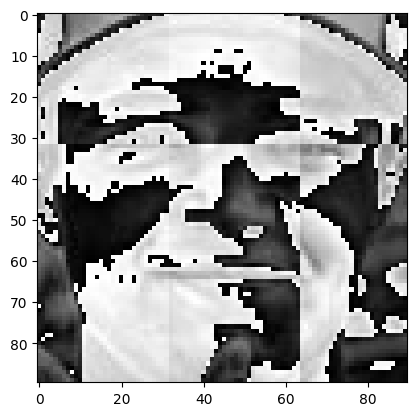

In [91]:
im_har = w2d(cropped_img, 'db1', 5) #Can change the level a bit for a different result
plt.imshow(im_har, cmap = 'gray')

I want to use both the colored image and the wavelet transformed image. I am going to stack them vertically. Stacking your image and the wavelet transformed image is a technique for enhancing the performance of machine learning models, especially when dealing with texture-rich images

In [92]:
f1_file_names_dict

{'charles_leclerc': ['dataset/cropped/charles_leclerc/charles_leclerc1.png',
  'dataset/cropped/charles_leclerc/charles_leclerc2.png',
  'dataset/cropped/charles_leclerc/charles_leclerc3.png',
  'dataset/cropped/charles_leclerc/charles_leclerc4.png',
  'dataset/cropped/charles_leclerc/charles_leclerc5.png',
  'dataset/cropped/charles_leclerc/charles_leclerc6.png',
  'dataset/cropped/charles_leclerc/charles_leclerc7.png',
  'dataset/cropped/charles_leclerc/charles_leclerc8.png',
  'dataset/cropped/charles_leclerc/charles_leclerc9.png',
  'dataset/cropped/charles_leclerc/charles_leclerc10.png',
  'dataset/cropped/charles_leclerc/charles_leclerc11.png',
  'dataset/cropped/charles_leclerc/charles_leclerc12.png',
  'dataset/cropped/charles_leclerc/charles_leclerc13.png',
  'dataset/cropped/charles_leclerc/charles_leclerc14.png',
  'dataset/cropped/charles_leclerc/charles_leclerc15.png',
  'dataset/cropped/charles_leclerc/charles_leclerc16.png',
  'dataset/cropped/charles_leclerc/charles_lec

Here I am going to create my training data after vertically stacking the images. 
X is going to be the image. y is going to be the name of the driver

In [93]:
#The names of the drivers have to be converted to a numerical value. I'm just going to assign each driver an id
class_dict = {}
count = 0
for f1_name in f1_file_names_dict.keys():
    class_dict[f1_name] = count
    count = count + 1
class_dict

{'charles_leclerc': 0,
 'lewis_hamilton': 1,
 'carlos_sainz': 2,
 'sebastian_vettel': 3,
 'daniel_ricciardo': 4}

In [94]:
X = []
y = []

for f1_name, f1_paths in f1_file_names_dict.items():
    for f1_path in f1_paths:
        img = cv2.imread(f1_path)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[f1_name])

In [95]:
len(X[0])

4096

In [96]:
X[0]

array([[250],
       [244],
       [251],
       ...,
       [ 18],
       [  9],
       [223]], dtype=uint8)

In [97]:
len(X)

327

I want to convert X into an array of floats with the shape of (327, 4096)

In [98]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(327, 4096)

In [99]:
X

array([[250., 244., 251., ...,  18.,   9., 223.],
       [ 86.,  68.,  69., ...,   0.,   0.,   0.],
       [ 52.,  51.,  31., ...,  84., 210.,  80.],
       ...,
       [146., 133., 130., ...,  48., 248., 244.],
       [155., 103.,  90., ...,   4.,   0., 255.],
       [ 49.,  61.,  65., ..., 248., 242., 254.]])

In [100]:
X[0]

array([250., 244., 251., ...,  18.,   9., 223.])

## The data has now been cleaned. Time to work on the model
Going to try different models to see which one works best with my images

In [101]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report

In [102]:
# Split into xtrain ytrain xtest ytest
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Going to create a pipeline. In the pipeline, want to try to scale the data so it is more or less normally distributed. May not be nessessary with image data. Might remove it later. I am also going to create by scv model

In [103]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8170731707317073

In [104]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85        24
           1       0.87      0.87      0.87        15
           2       1.00      0.30      0.46        10
           3       0.86      0.92      0.89        13
           4       0.80      0.80      0.80        20

    accuracy                           0.82        82
   macro avg       0.86      0.77      0.77        82
weighted avg       0.84      0.82      0.80        82



Not the best score. Going to try different models and tuning

## I am going to use RandomizedSearch and let it search for the best combination of hyperparameters. Then I am going to use GridSearch to fine tune it

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [106]:
# I did some research to figure out which parameters to test
np.random.seed(42)
model_params_rs = {
    'svm' : {
        'model': svm.SVC(),
        'params': {
            'svc__C': [0.1, 1, 10, 100, 1000], # Smaller values may help with generalization
            'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10, 100, 200, 500, 1000, 1200],
            'randomforestclassifier__max_depth': [None, 5, 10, 20, 30],
            'randomforestclassifier__max_features': ['auto', 'sqrt'],
            'randomforestclassifier__min_samples_split': [2, 4, 6],
            'randomforestclassifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear'),
        'params': {
            'logisticregression__penalty': ['l1', 'l2'],
            'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Smaller values may help with generalization
            'logisticregression__fit_intercept': [True, False],
            'logisticregression__solver': ['liblinear', 'saga'],  # Suitable for small datasets and classification
            'logisticregression__max_iter': [50, 100, 200],
            
        }
    }
}

In [107]:
import pandas as pd
np.random.seed(42)
scores_rs = []
best_estimators_rs = {}
for algo, params in model_params_rs.items():
    pipe = make_pipeline(StandardScaler(), params['model'])
    clf = RandomizedSearchCV(pipe, params['params'], n_iter = 10, cv = 5, verbose = 2, return_train_score=False)
    print(clf)
    clf.fit(X_train, y_train)
    scores_rs.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators_rs[algo] = clf.best_estimator_
df_rs = pd.DataFrame(scores_rs, columns = ['model', 'best_score', 'best_params'])
df_rs

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC())]),
                   param_distributions={'svc__C': [0.1, 1, 10, 100, 1000],
                                        'svc__gamma': [1, 0.1, 0.01, 0.001,
                                                       0.0001],
                                        'svc__kernel': ['rbf', 'linear']},
                   verbose=2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......svc__C=1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=1, svc__gamma=0.1, svc__kernel=linear; total time=   0.

/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    re

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression(solver='liblinear'))]),
                   param_distributions={'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  100],
                                        'logisticregression__fit_intercept': [True,
                                                                              False],
                                        'logisticregression__max_iter': [50,
                                                                         100,
                                                                         200],
                                        'logisticregress

/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=saga; total time=   2.6s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=saga; total time=   2.7s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=saga; total time=   2.6s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=saga; total time=   2.7s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=saga; total time=   2.6s
[CV] END logisticregression__C=0.1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.2s
[CV] END logisticregression__C=0.1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.2s
[CV] END logisticregression__C=0.1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.2s
[CV] END logisticregression__C=0.1, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.2s
[CV] END log

/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=10, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   1.6s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=10, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   1.6s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=10, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   1.6s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=10, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   1.6s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=10, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   1.6s
[CV] END logisticregression__C=0.01, logisticregression__fit_intercept=False, logisticregression__max_iter=200, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.1s
[CV] END logisticregression__C=0.01, logisticregression__fit_intercept=False, logisticregression__max_iter=200, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.1s
[CV] END logisticregression__C=0.01, logisticregression__fit_intercept=False, logisticregression__max_iter=200, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.1s
[CV] END logisticregression__C=0.01, logisticregression__fit_intercept=False, logisticregression__max_iter=200, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   0.1s
[CV

/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=200, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   3.1s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=200, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   3.1s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=200, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   3.1s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=200, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   3.2s


/Users/davidsackler/Documents/Machine Learning/Formula-One-Image-Classification/venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END logisticregression__C=1, logisticregression__fit_intercept=True, logisticregression__max_iter=200, logisticregression__penalty=l2, logisticregression__solver=saga; total time=   3.2s


,model,best_score,best_params
0,svm,0.759184,"{'svc__kernel': 'linear', 'svc__gamma': 0.1, '..."
1,random_forest,0.644898,"{'randomforestclassifier__n_estimators': 1000,..."
2,logistic_regression,0.779592,"{'logisticregression__solver': 'liblinear', 'l..."


In [127]:
best_estimators_rs

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma=0.1, kernel='linear'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=1000))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, fit_intercept=False, max_iter=200,
                                     solver='liblinear'))])}

In [109]:
best_estimators_rs['svm'].score(X_test, y_test)

0.8780487804878049

In [110]:
best_estimators_rs['random_forest'].score(X_test, y_test)

0.7926829268292683

In [111]:
best_estimators_rs['logistic_regression'].score(X_test, y_test)

0.8902439024390244

In [112]:
for index, row in df_rs.iterrows():
    print(row.model, row.best_params)

svm {'svc__kernel': 'linear', 'svc__gamma': 0.1, 'svc__C': 1}
random_forest {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': None}
logistic_regression {'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 200, 'logisticregression__fit_intercept': False, 'logisticregression__C': 10}


In [133]:
rs_preds = best_estimators_rs['logistic_regression'].predict(X_test)
pd.DataFrame(classification_report(y_test, rs_preds, output_dict = True))

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.916667,0.789474,0.818182,0.923077,1.000000,0.890244,0.889480,0.902731
recall,0.916667,1.000000,0.900000,0.923077,0.750000,0.890244,0.897949,0.890244
f1-score,0.916667,0.882353,0.857143,0.923077,0.857143,0.890244,0.887276,0.889629
support,24.000000,15.000000,10.000000,13.000000,20.000000,0.890244,82.000000,82.000000


### Going to setup my gridsearch based on the results of my randomized search

In [113]:
np.random.seed(42)
model_params_gs = {
    'svm' : {
        'model': svm.SVC(),
        'params': {
            'svc__C': [0.1, 1, 10], # Smaller values may help with generalization
            'svc__gamma': [1, 0.1, 0.01],
            'svc__kernel': ['linear']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear'),
        'params': {
            'logisticregression__penalty': ['l1', 'l2'],
            'logisticregression__C': [0.01, 0.1, 1, 10],  # Smaller values may help with generalization
            'logisticregression__fit_intercept': [True, False],
            'logisticregression__solver': ['liblinear'],  # Suitable for small datasets and classification
            'logisticregression__max_iter': [100, 200],
            
        }
    }
}

In [121]:
np.random.seed(42)
scores_gs = []
best_estimators_gs = {}
for algo, params in model_params_gs.items():
    pipe = make_pipeline(StandardScaler(), params['model'])
    clf = GridSearchCV(pipe, params['params'], cv = 7, verbose = 2, return_train_score=False)
    clf.fit(X_train, y_train)
    scores_gs.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators_gs[algo] = clf.best_estimator_
df_gs = pd.DataFrame(scores_gs, columns = ['model', 'best_score', 'best_params'])
df_gs

Fitting 7 folds for each of 9 candidates, totalling 63 fits
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.1s
[CV] END .......svc__C=0.1, svc__gamma=1, svc__kernel=linear; total time=   0.1s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__kernel=linear; total time=   0.1s
[CV] END .....svc__C=0.1, svc__gamma=0.1, svc__ke

,model,best_score,best_params
0,svm,0.779592,"{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'..."
1,logistic_regression,0.816327,"{'logisticregression__C': 0.1, 'logisticregres..."


In [122]:
best_estimators_gs['svm'].score(X_test, y_test)

0.8780487804878049

In [123]:
best_estimators_gs['logistic_regression'].score(X_test, y_test)

0.8780487804878049

In [124]:
df_gs

,model,best_score,best_params
0,svm,0.779592,"{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'..."
1,logistic_regression,0.816327,"{'logisticregression__C': 0.1, 'logisticregres..."


In [134]:
gs_preds = best_estimators_gs['logistic_regression'].predict(X_test)
pd.DataFrame(classification_report(y_test, gs_preds, output_dict = True))

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.846154,0.812500,0.818182,0.923077,1.000000,0.878049,0.879983,0.886305
recall,0.916667,0.866667,0.900000,0.923077,0.800000,0.878049,0.881282,0.878049
f1-score,0.880000,0.838710,0.857143,0.923077,0.888889,0.878049,0.877564,0.878657
support,24.000000,15.000000,10.000000,13.000000,20.000000,0.878049,82.000000,82.000000


In [135]:
gs_preds = best_estimators_gs['svm'].predict(X_test)
pd.DataFrame(classification_report(y_test, gs_preds, output_dict = True))

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.827586,0.866667,0.857143,0.923077,0.944444,0.878049,0.883783,0.881980
recall,1.000000,0.866667,0.600000,0.923077,0.850000,0.878049,0.847949,0.878049
f1-score,0.905660,0.866667,0.705882,0.923077,0.894737,0.878049,0.859205,0.874261
support,24.000000,15.000000,10.000000,13.000000,20.000000,0.878049,82.000000,82.000000


### Good news! I improved from my original .81 to .87! 

Going to make a confusion matrix to understand correct predictions

In [136]:
best_clf_gs = best_estimators_gs['svm']

Text(95.72222222222221, 0.5, 'Truth')

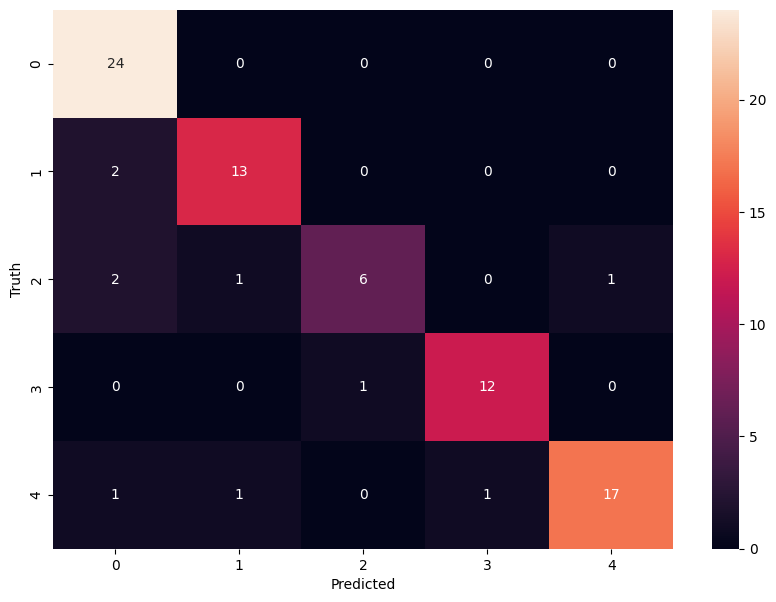

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, best_clf_gs.predict(X_test))

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [120]:
class_dict

{'charles_leclerc': 0,
 'lewis_hamilton': 1,
 'carlos_sainz': 2,
 'sebastian_vettel': 3,
 'daniel_ricciardo': 4}

### Pretty good for for all drivers. Definitely some mistakes, but all around pretty good

# Time to save the model

In [138]:
!pip install joblib
import joblib

joblib.dump(best_clf, 'saved_model.pkl')


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


['saved_model.pkl']

In [139]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))